In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dheerajyeshiva/DAV-6150/refs/heads/main/M7_Data.csv')

In [4]:
df.shape

(14016, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [6]:
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [7]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

Column 'TARGET' has 2 unique values.
Column 'loyalty' has 5 unique values.
Column 'ID' has 11008 unique values.
Column 'age' has 86 unique values.
Column 'city' has 65 unique values.
Column 'LOR' has 7 unique values.
Column 'prod_A' has 2 unique values.
Column 'type_A' has 3 unique values.
Column 'type_B' has 4 unique values.
Column 'prod_B' has 2 unique values.
Column 'turnover_A' has 11008 unique values.
Column 'turnover_B' has 11008 unique values.
Column 'contract' has 1 unique values.
Column 'age_P' has 86 unique values.
Column 'lor_M' has 7 unique values.


In [8]:
df.isnull().values.any()

False

In [9]:
df.duplicated().value_counts()  #check for duplicates

,count
False,11008
True,3008


There are 3008 duplicate rows in the dataset

In [10]:
#dropping the duplicate values
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df.shape

(11008, 15)

In [12]:
# dropping ID as it has all unique values and it is not gonna be useful for our further analysis and model building
df.drop('ID', axis=1, inplace=True)

In [13]:
# dropping contract feature as it has one unique value(2) which wont be useful too
df.drop('contract', axis=1, inplace=True)

In [14]:
# dropping LOR( Length of Relationship in years) as we can derive this using the LOR(in months)
df.drop('LOR', axis=1, inplace=True)

In [15]:
df.describe()

,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,46.533612,34.845203,-724.143078,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,34.845203,14.791788
std,48.292402,13.032781,26949.664365,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,13.032781,11.272981
min,0.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,5.000000,3.000000
25%,2.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,24.000000,3.000000
50%,3.000000,31.000000,2.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,31.000000,15.000000
75%,99.000000,42.000000,2.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,42.000000,15.000000
max,99.000000,102.000000,235.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,102.000000,75.000000


In [16]:
# age and age_p are same values and hence one of them can be dropped too
df.drop('age_P', axis=1, inplace=True)

In [17]:
df.columns

Index(['TARGET', 'loyalty', 'age', 'city', 'prod_A', 'type_A', 'type_B',
       'prod_B', 'turnover_A', 'turnover_B', 'lor_M'],
      dtype='object')

In [18]:
df.head()

,TARGET,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,Y,99,66,2,0,0,0,0,333.561114,264.721010,3
1,Y,1,45,2,1,3,3,1,394.735699,284.904978,39
2,Y,1,42,2,1,3,6,1,342.180990,1175.589721,27
3,Y,99,31,2,0,0,0,0,453.757916,242.341754,3
4,Y,99,62,2,0,0,0,0,384.577469,287.008370,3


In [19]:
df.TARGET.value_counts()

,count
TARGET,
N,8000
Y,3008


In [20]:
# Changing the Target values from string to boolean
df['TARGET']=df['TARGET'].apply(lambda x:1 if x=='Y' else 0)

In [21]:
df.head()

,TARGET,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,66,2,0,0,0,0,333.561114,264.721010,3
1,1,1,45,2,1,3,3,1,394.735699,284.904978,39
2,1,1,42,2,1,3,6,1,342.180990,1175.589721,27
3,1,99,31,2,0,0,0,0,453.757916,242.341754,3
4,1,99,62,2,0,0,0,0,384.577469,287.008370,3


In [22]:
# Group by 'prod_A' and 'type_A' and count the occurrences
prod_type_count_a = df.groupby(['prod_A', 'type_A']).size().reset_index(name='count')
prod_type_count_a

,prod_A,type_A,count
0,0,0,4575
1,1,3,6410
2,1,6,23


In [23]:
# Group by 'prod_B' and 'type_B' and count the occurrences
prod_type_count_b = df.groupby(['prod_B', 'type_B']).size().reset_index(name='count')
prod_type_count_b

,prod_B,type_B,count
0,0,0,3828
1,1,3,6695
2,1,6,452
3,1,9,33


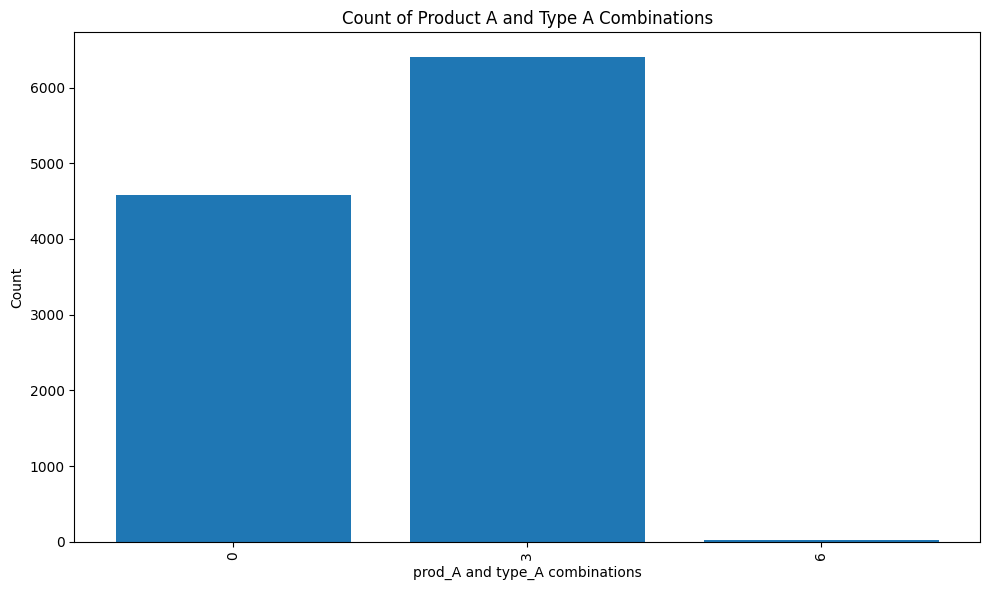

In [24]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(prod_type_count_a['type_A'].astype(str), prod_type_count_a['count'])

# Set the labels and title
plt.xlabel('prod_A and type_A combinations')
plt.ylabel('Count')
plt.title('Count of Product A and Type A Combinations')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

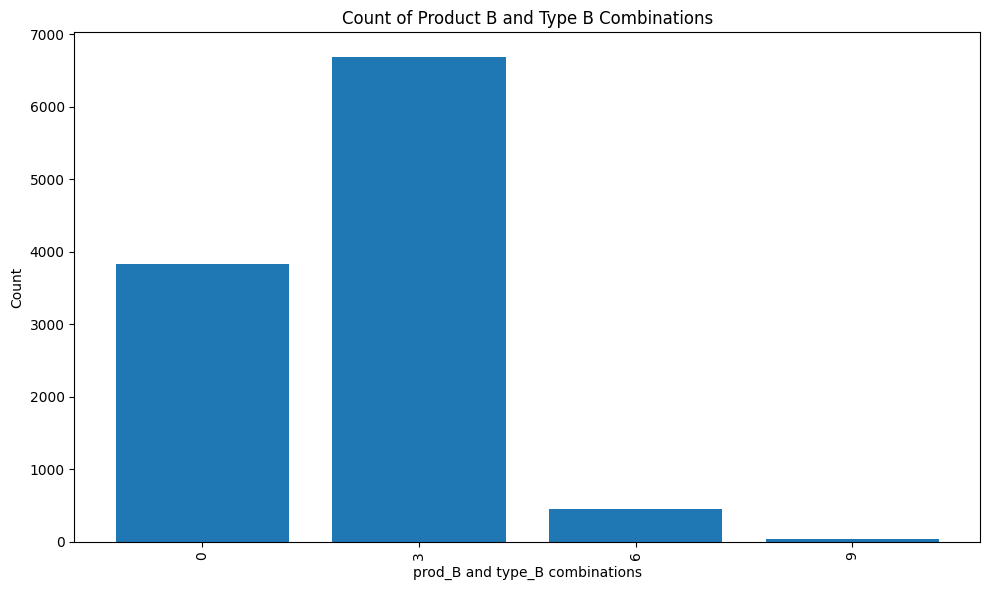

In [25]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(prod_type_count_b['type_B'].astype(str), prod_type_count_b['count'])

# Set the labels and title
plt.xlabel('prod_B and type_B combinations')
plt.ylabel('Count')
plt.title('Count of Product B and Type B Combinations')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
df.head()

,TARGET,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,66,2,0,0,0,0,333.561114,264.721010,3
1,1,1,45,2,1,3,3,1,394.735699,284.904978,39
2,1,1,42,2,1,3,6,1,342.180990,1175.589721,27
3,1,99,31,2,0,0,0,0,453.757916,242.341754,3
4,1,99,62,2,0,0,0,0,384.577469,287.008370,3


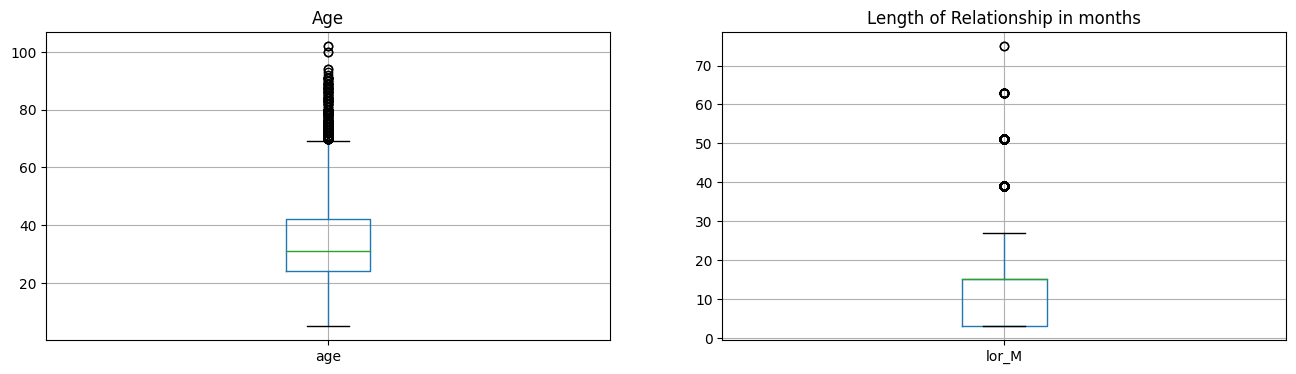

In [27]:
#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
df.boxplot(column='age');
plt.title("Age");


plt.subplot(1, 2, 2)
df.boxplot(column='lor_M');
plt.title("Length of Relationship in months");

In [28]:
len(df[df.age > 60])

541

In [29]:
len(df[df.lor_M > 30])

802

In [30]:
df['loyalty'].value_counts()

,count
loyalty,
99,5048
3,2701
1,2019
2,1184
0,56


In [31]:
def plot_countplots(df, columns):
    """
    Plots countplots for specified columns in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to create countplots for.
    """
    # Set the number of subplots based on the number of columns
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Arrange plots in rows

    plt.figure(figsize=(12, num_rows * 4))  # Adjust figure size

    for i, column in enumerate(columns):
        plt.subplot(num_rows, 2, i + 1)  # Create subplot
        sns.countplot(data=df, x=column, hue='TARGET')  # Create countplot
        plt.title(f'Count Plot for {column}')
        # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots



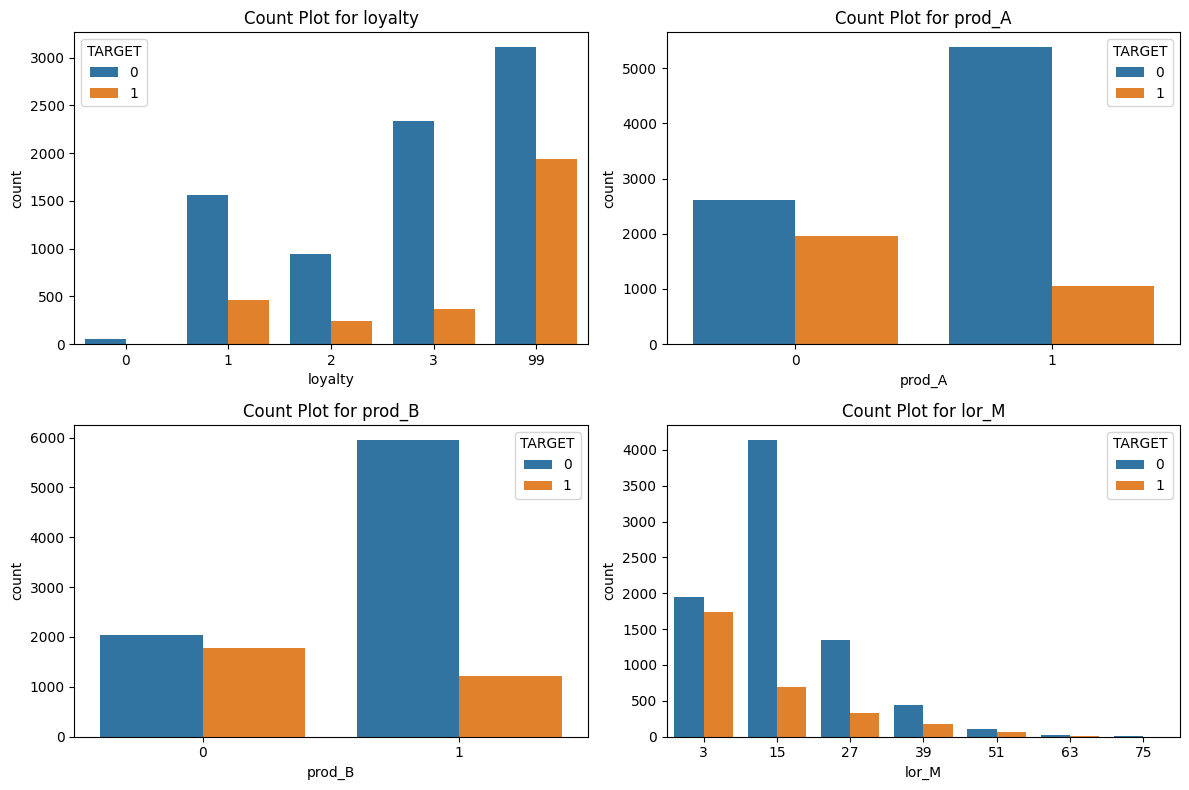

In [32]:
plot_countplots(df, ['loyalty','prod_A','prod_B','lor_M'])

In [33]:
df.TARGET.value_counts()

,count
TARGET,
0,8000
1,3008


In [34]:
df.head()

,TARGET,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,66,2,0,0,0,0,333.561114,264.721010,3
1,1,1,45,2,1,3,3,1,394.735699,284.904978,39
2,1,1,42,2,1,3,6,1,342.180990,1175.589721,27
3,1,99,31,2,0,0,0,0,453.757916,242.341754,3
4,1,99,62,2,0,0,0,0,384.577469,287.008370,3


In [35]:
df.shape

(11008, 11)

In [36]:
# we shall perform one hot encoding on loyalty
df['loyalty'] = df['loyalty'].replace({0: 'loyalty_0', 1: 'loyalty_1', 2: 'loyalty_2', 3: 'loyalty_3', 99: 'loyalty_99'})

# Apply one-hot encoding to create new columns
df = pd.get_dummies(df, columns=['loyalty'], prefix='', prefix_sep='')

df.head()
# # Rename the loyalty columns
df.rename(columns={
    'loyalty_0': 'loyalty_none',
    'loyalty_1': 'loyalty_low',
    'loyalty_2': 'loyalty_medium',
    'loyalty_3': 'loyalty_high',
    'loyalty_99': 'loyalty_unclassified'
}, inplace=True)

df.head()


,TARGET,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified
0,1,66,2,0,0,0,0,333.561114,264.721010,3,False,False,False,False,True
1,1,45,2,1,3,3,1,394.735699,284.904978,39,False,True,False,False,False
2,1,42,2,1,3,6,1,342.180990,1175.589721,27,False,True,False,False,False
3,1,31,2,0,0,0,0,453.757916,242.341754,3,False,False,False,False,True
4,1,62,2,0,0,0,0,384.577469,287.008370,3,False,False,False,False,True


In [37]:
df.dtypes

,0
TARGET,int64
age,int64
city,int64
prod_A,int64
type_A,int64
type_B,int64
prod_B,int64
turnover_A,float64
turnover_B,float64
lor_M,int64


In [38]:
df[['loyalty_none','loyalty_low','loyalty_medium','loyalty_high','loyalty_unclassified']] = df[['loyalty_none','loyalty_low','loyalty_medium','loyalty_high','loyalty_unclassified']].astype(int)

In [39]:
df.head()

,TARGET,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified
0,1,66,2,0,0,0,0,333.561114,264.721010,3,0,0,0,0,1
1,1,45,2,1,3,3,1,394.735699,284.904978,39,0,1,0,0,0
2,1,42,2,1,3,6,1,342.180990,1175.589721,27,0,1,0,0,0
3,1,31,2,0,0,0,0,453.757916,242.341754,3,0,0,0,0,1
4,1,62,2,0,0,0,0,384.577469,287.008370,3,0,0,0,0,1


In [40]:
df.shape

(11008, 15)

In [41]:
df.city.value_counts()

,count
city,
2,10769
0,20
1,17
8,17
9,16
...,...
72,1
31,1
51,1


In [42]:
len(df[df.city == -999999])

8

The value -999999 in your city column is likely an invalid placeholder or a missing data indicator. This is a common approach when datasets use extreme or unlikely values to represent missing or undefined entries (also called sentinel values).

In [43]:
# Drop rows the with value -999999 as the number  of the rows are around 8 values which is pretty less
df = df[df.city != -999999]
df.shape

(11000, 15)

In [44]:
# Replace other city codes with 'other_city'
df['city'] = df['city'].apply(lambda x: 'city_2' if x == 2 else 'other_city')

# Apply one-hot encoding to create new columns
df = pd.get_dummies(df, columns=['city'], prefix='', prefix_sep='')


In [45]:
df[['city_2','other_city']] = df[['city_2','other_city']].astype(int)

In [46]:
df.head()

,TARGET,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified,city_2,other_city
0,1,66,0,0,0,0,333.561114,264.721010,3,0,0,0,0,1,1,0
1,1,45,1,3,3,1,394.735699,284.904978,39,0,1,0,0,0,1,0
2,1,42,1,3,6,1,342.180990,1175.589721,27,0,1,0,0,0,1,0
3,1,31,0,0,0,0,453.757916,242.341754,3,0,0,0,0,1,1,0
4,1,62,0,0,0,0,384.577469,287.008370,3,0,0,0,0,1,1,0


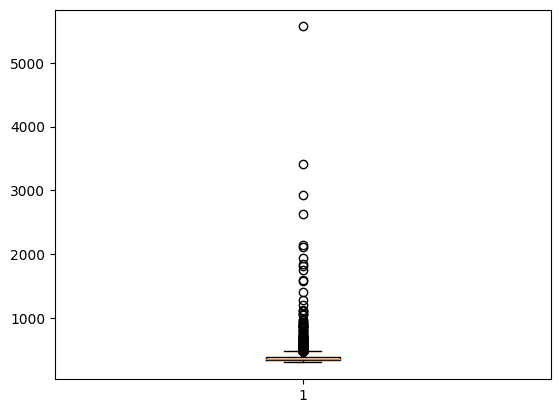

In [47]:
plt.boxplot(df['turnover_A'])
plt.show()

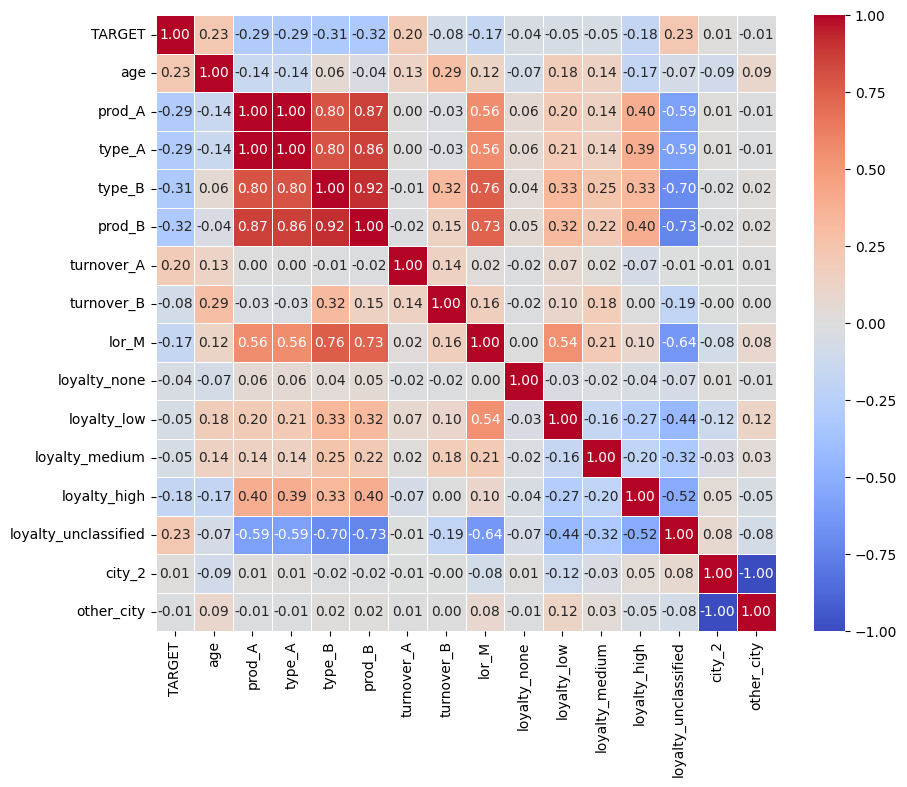

In [48]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

Boxplot for age


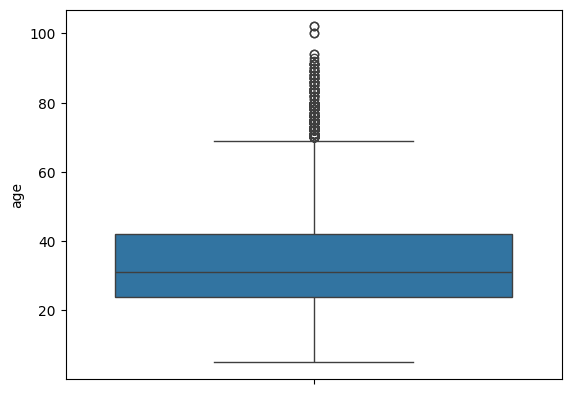



Boxplot for turnover_A


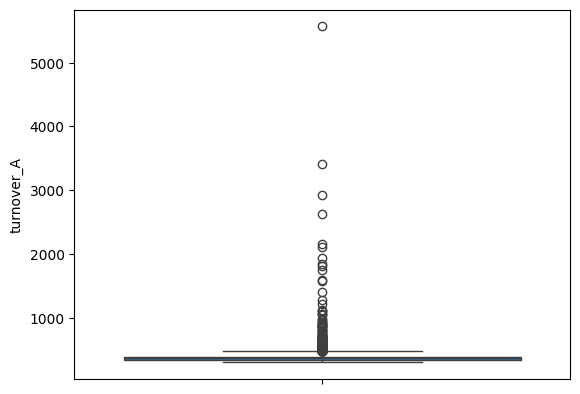



Boxplot for turnover_B


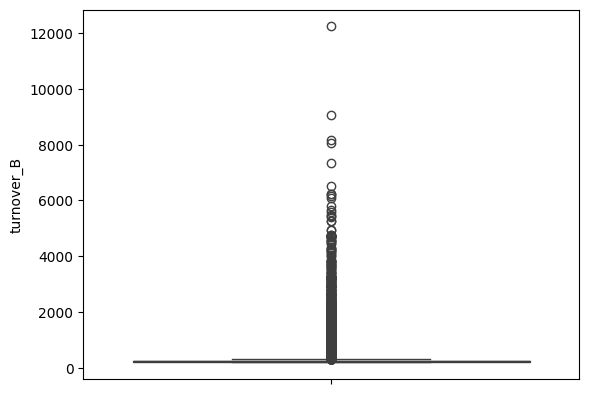



Boxplot for lor_M


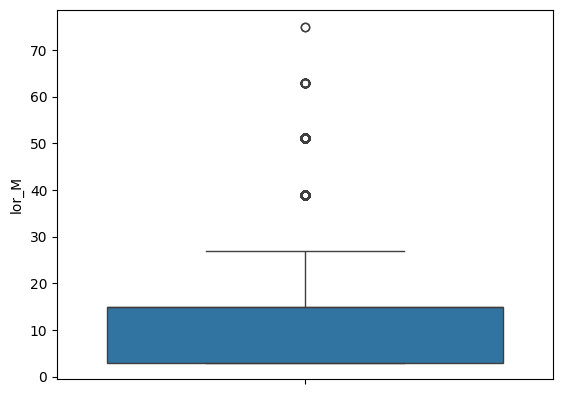

In [49]:
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  print(f"Boxplot for {i}")
  sns.boxplot(df[i])
  plt.show()
  print("\n")

Histogram for age


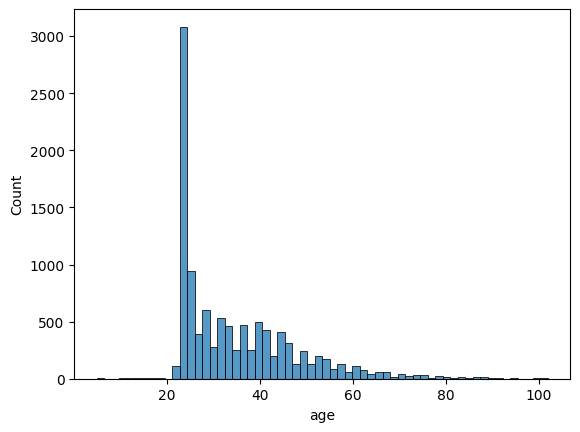



Histogram for turnover_A


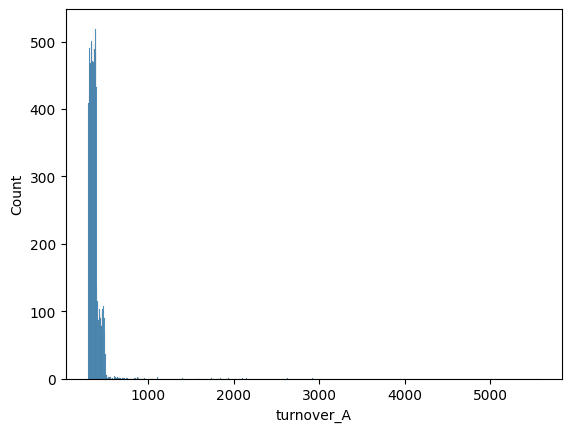



Histogram for turnover_B


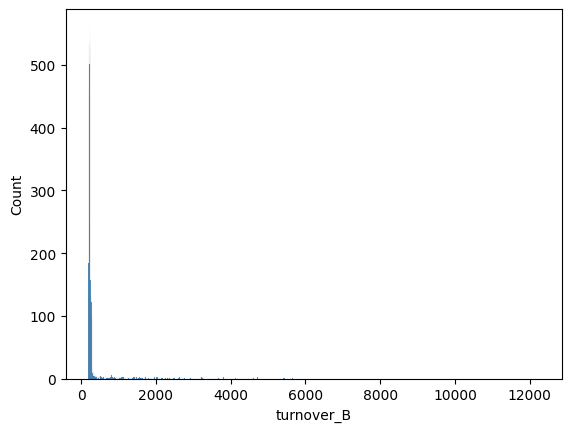



Histogram for lor_M


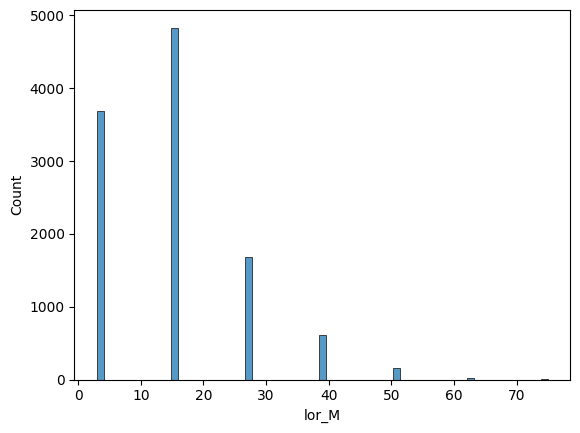

In [50]:
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  print(f"Histogram for {i}")
  sns.histplot(df[i])
  plt.show()
  print("\n")

In [51]:
# Expect prod_A and prod_B Applying logscaling on every feature
logsc_col = []
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  df[f"logscale_{i}"] = np.log1p(df[i])
  logsc_col.append(f"logscale_{i}")

Boxplot for logscale_age


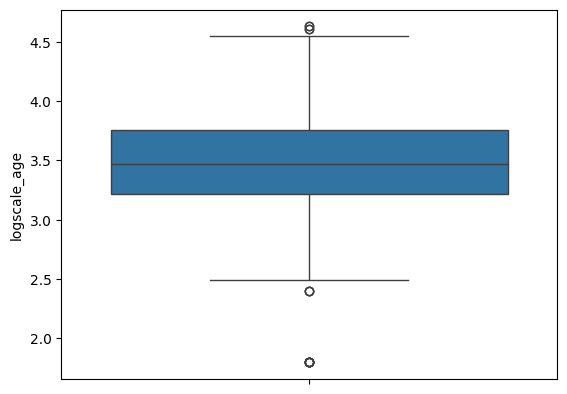



Boxplot for logscale_turnover_A


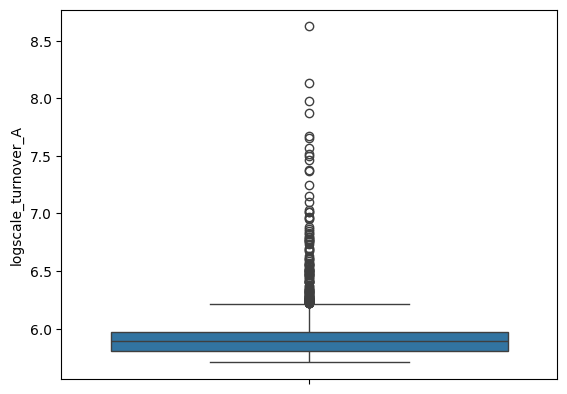



Boxplot for logscale_turnover_B


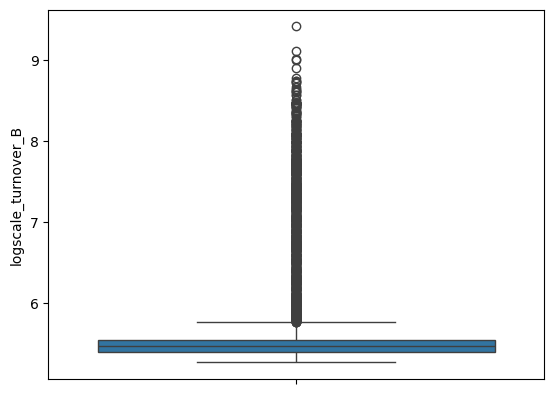



Boxplot for logscale_lor_M


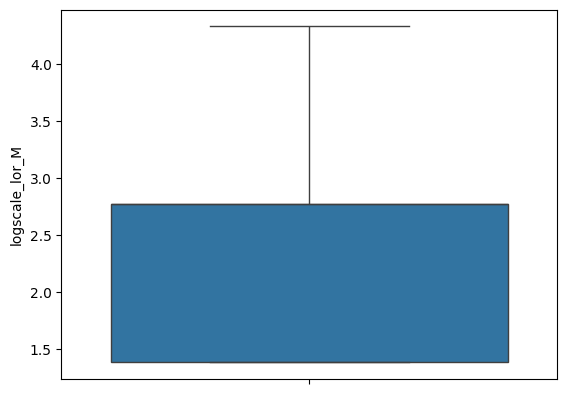

In [52]:
for i in logsc_col:
  print(f"Boxplot for {i}")
  sns.boxplot(df[i])
  plt.show()
  print("\n")

In [53]:
# drop all the non log transformed columns :
df.drop(['age', 'turnover_A', 'turnover_B', 'lor_M'],axis=1,inplace=True)

In [54]:
df.columns

Index(['TARGET', 'prod_A', 'type_A', 'type_B', 'prod_B', 'loyalty_none',
       'loyalty_low', 'loyalty_medium', 'loyalty_high', 'loyalty_unclassified',
       'city_2', 'other_city', 'logscale_age', 'logscale_turnover_A',
       'logscale_turnover_B', 'logscale_lor_M'],
      dtype='object')

PCA

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
def LR_metrics(y_test, y_pred):
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

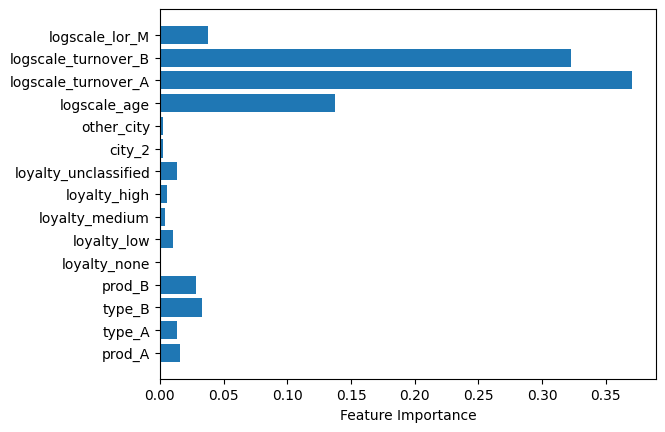

                 Feature  Importance
12   logscale_turnover_A    0.370647
13   logscale_turnover_B    0.322982
11          logscale_age    0.137540
14        logscale_lor_M    0.038077
2                 type_B    0.033415
3                 prod_B    0.028702
0                 prod_A    0.016179
8   loyalty_unclassified    0.013698


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df[['prod_A', 'type_A', 'type_B', 'prod_B', 'loyalty_none',
        'loyalty_low', 'loyalty_medium', 'loyalty_high', 'loyalty_unclassified',
        'city_2', 'other_city', 'logscale_age', 'logscale_turnover_A',
        'logscale_turnover_B', 'logscale_lor_M']]
y = df['TARGET']

# Create and train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plotting feature importance
import matplotlib.pyplot as plt
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.show()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 8 most important features
print(feature_importances.head(8))

In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df[['prod_A', 'type_A', 'type_B', 'prod_B', 'loyalty_none',
        'loyalty_low', 'loyalty_medium', 'loyalty_high', 'loyalty_unclassified',
        'city_2', 'other_city', 'logscale_age', 'logscale_turnover_A',
        'logscale_turnover_B', 'logscale_lor_M']]
y = df['TARGET']

# Initialize the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=8)

# Fit RFE
rfe.fit(X, y)

# Get the mask of selected features (True means selected)
selected_features = rfe.support_

# Create a DataFrame for better visualization
rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features
})

# Filter out the selected features
top_features_rfe = rfe_features[rfe_features['Selected']]['Feature'].values
X_top_rfe = X[top_features_rfe]

# Print the selected top 8 features
print(top_features_rfe)


['type_A' 'type_B' 'prod_B' 'loyalty_low' 'logscale_age'
 'logscale_turnover_A' 'logscale_turnover_B' 'logscale_lor_M']


# Model Building

In [58]:
df.shape

(11000, 16)

In [59]:
X= df[top_features_rfe]
y = df.TARGET

In [60]:
X.head()

,type_A,type_B,prod_B,loyalty_low,logscale_age,logscale_turnover_A,logscale_turnover_B,logscale_lor_M
0,0,0,0,0,4.204693,5.812820,5.582447,1.386294
1,3,3,1,1,3.828641,5.980747,5.655660,3.688879
2,3,6,1,1,3.761200,5.838258,7.070375,3.332205
3,0,0,0,0,3.465736,6.119765,5.494467,1.386294
4,0,0,0,0,4.143135,5.954742,5.662990,1.386294


In [61]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
def LR_metrics(y_test, y_pred):
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

def ROC_AUC_curve(y_test, y_pred):
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

def kfoldcv(X_train_sm,y_t):
  # Kfolds cv where splits = 5
  kf = KFold(n_splits=5)
  # List to store R^2 scores
  accuracy_lis = []

  # K-Fold Cross Validation
  for train_index, test_index in kf.split(X_train_sm):
      X_train, X_test = X_train_sm.iloc[train_index], X_train_sm.iloc[test_index]
      y_train, y_test = y_t.iloc[train_index], y_t.iloc[test_index]

      # Fit the OLS model
      model = sm.GLM(y_train,X_train, family = sm.families.Binomial()).fit()
      # model = sm.OLS(y_train, X_train).fit()

      # Predict on the test data
      y_pred = model.predict(X_test)
      y_pred = np.where(y_pred>0.5,1,0)


      # Calculate R^2 for the test set
      accuracy = accuracy_score(y_test, y_pred)
      accuracy_lis.append(accuracy)

  # Print the R^2 scores for each fold
  print("Cross-validated Accuracy scores:", accuracy_lis)
  print("Mean Accuracy score:", np.mean(accuracy_lis))

In [65]:
# Logistic regression using statsmodel library:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
print("Cross valudation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8241
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3669.3
Date:                Sun, 20 Oct 2024   Deviance:                       7338.5
Time:                        17:57:39   Pearson chi2:                 1.71e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2480
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -41.1408    

Accuracy Score: 0.8127272727272727
Confusion Matrix: 
[[1867  138]
 [ 377  368]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2005
           1       0.73      0.49      0.59       745

    accuracy                           0.81      2750
   macro avg       0.78      0.71      0.73      2750
weighted avg       0.80      0.81      0.80      2750

ROC AUC Score: 0.7125659006845304


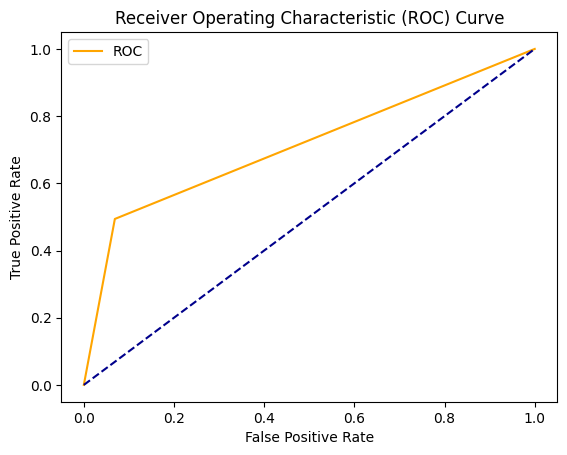

In [66]:
y_pred = res.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)
ROC_AUC_curve(y_test, y_pred)

In [67]:
# null error rate
y_test.value_counts()[0]/y_test.shape[0]

0.7290909090909091

Model 2

In [68]:
# Drop prod_B since it has p > 0.05
X2=X.drop(['logscale_lor_M'],axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

In [70]:
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())
print("Cross valudation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8242
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3670.7
Date:                Sun, 20 Oct 2024   Deviance:                       7341.4
Time:                        17:57:40   Pearson chi2:                 1.60e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2477
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -40.8593    

In [71]:
y_pred = res2.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)

Accuracy Score: 0.8116363636363636
Confusion Matrix: 
[[1865  140]
 [ 378  367]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2005
           1       0.72      0.49      0.59       745

    accuracy                           0.81      2750
   macro avg       0.78      0.71      0.73      2750
weighted avg       0.80      0.81      0.80      2750



In [72]:
# drop prod_b
X3=X2.drop(['prod_B'],axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=42)

In [74]:
logm3 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())
print("Cross valudation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3671.6
Date:                Sun, 20 Oct 2024   Deviance:                       7343.1
Time:                        17:57:40   Pearson chi2:                 1.76e+06
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2476
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -41.0378    

In [75]:
y_pred = res3.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)

Accuracy Score: 0.812
Confusion Matrix: 
[[1865  140]
 [ 377  368]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2005
           1       0.72      0.49      0.59       745

    accuracy                           0.81      2750
   macro avg       0.78      0.71      0.73      2750
weighted avg       0.80      0.81      0.80      2750



# PCA

In [76]:
X = df.drop('TARGET',axis=1)
y = df.TARGET.reset_index(drop=True)

In [77]:
PCA_group=['logscale_age', 'logscale_turnover_A',
       'logscale_turnover_B', 'logscale_lor_M']

In [78]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X[PCA_group])

# Output the number of components retained
print(f'Original number of features: {X[PCA_group].shape[1]}')
print(f'Number of PCA components: {X_pca.shape[1]}')

print(pca.explained_variance_ratio_)  # Variance explained by each component
print(f'Total variance explained by selected components: {sum(pca.explained_variance_ratio_)}')

Original number of features: 4
Number of PCA components: 3
[0.6571561  0.23984587 0.08314761]
Total variance explained by selected components: 0.9801495880132031


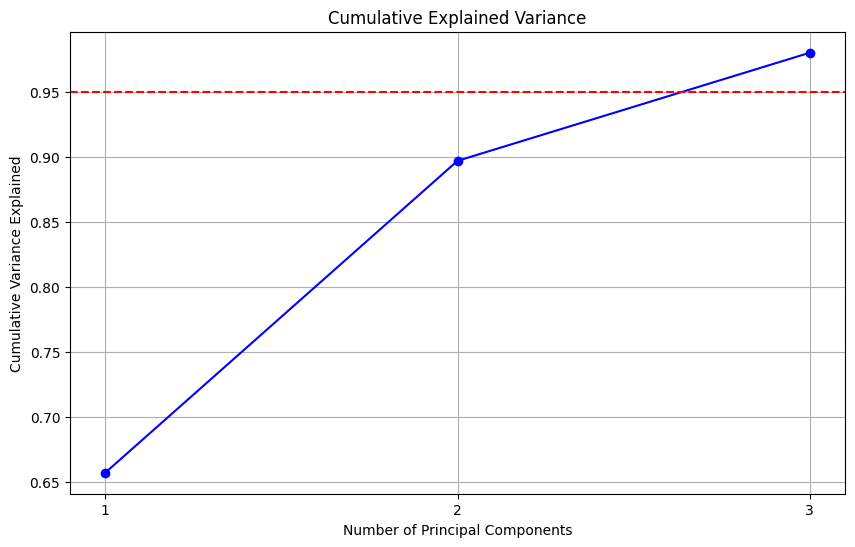

In [79]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--')  # Horizontal line for 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

In [80]:
pca = PCA(n_components=3)  # Specify the number of components again if you want
X_pca = pca.fit_transform(X[PCA_group])

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

In [81]:
df_gp2 = X.reset_index().drop('index', axis = 1)
new_df = pd.concat([df_gp2, df_pca], axis = 1)
X = new_df.drop(PCA_group, axis = 1)
import statsmodels.api as sm
X = sm.add_constant(X)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
  # Logistic regression using statsmodel library:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
print("Cross validation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8237
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4045.0
Date:                Sun, 20 Oct 2024   Deviance:                       8090.0
Time:                        17:57:41   Pearson chi2:                 8.15e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.1763
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7257 

In [84]:
y_pred = res.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)

Accuracy Score: 0.7734545454545455
Confusion Matrix: 
[[1849  156]
 [ 467  278]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2005
           1       0.64      0.37      0.47       745

    accuracy                           0.77      2750
   macro avg       0.72      0.65      0.66      2750
weighted avg       0.76      0.77      0.75      2750

